# OpenCV 영상 기본 연산

## 영상 기본 속성

OpenCV의 imread() 함수를 이용해서 이미지를 읽으면 넘파이 배열로 반환합니다. 영상처리를 비롯한 파이썬 데이터 프로그래밍을 잘 하려면 배열을 잘 다뤄야 하는데, 이것은 넘파이 패키지를 잘 다뤄야 한다는 것과 같습니다. 

영상처리에 사용하는 N-차원 배열은 한 화소의 값이 0-255 값만 가지면 되므로 부호(음수)를 갖지 않는 정수형(Unsigned int)으로 저장합니다. 넘파이에서는 이러한 타입으로 np.uint8 자료형을 정의해 놓았습니다. np.uint8 타입은 8비트이지만 음수를 사용하지 않으므로 가질 수 있는 값은 0-255입니다. 

In [ ]:
# 모양과 자료형
import cv2
import numpy as np

img = cv2.imread('./data/lena.jpg') # cv2.IMREAD_COLOR
##img = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

print('img.ndim=', img.ndim)
print('img.shape=', img.shape)
print('img.dtype=', img.dtype)

## np.bool, np.uint16, np.uint32, np.float32, np.float64, np.complex64
img=img.astype(np.int32)
print('img.dtype=',img.dtype)

img=np.uint8(img)
print('img.dtype=',img.dtype)

#cv2.imshow("", img)
#cv2.waitKey()
#cv2.destroyAllWindows()

In [3]:
# 모양 변경하기
import cv2
##import numpy as np

img = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
print('img.shape=', img.shape)

##img = img.reshape(img.shape[0]*img.shape[1])
img = img.flatten()
print('img.shape=', img.shape)

img = img.reshape(-1, 512, 512)
print('img.shape=', img.shape)

cv2.imshow('img', img[0])
cv2.waitKey()
cv2.destroyAllWindows()


img.shape= (512, 512)
img.shape= (262144,)


## 영상 화소 처리하기 

그레이스케일 이미지일 경우 shape 속성은 이미지의 행, 열 수를 반환합니다. 행 수는 이미지의 높이, 열 수는 이미지의 폭입니다. 그리고 이미지의 가장 왼쪽 위가 기준점 (0, 0)에 해당하면 오른쪽으로 갈수록 화소의 x 인덱스가 증가하며, 아래쪽으로 갈수록 화소의 y 인덱스가 증가합니다. 이미지에서 (x, y) 좌표 위치의 화소를 넘파이 배열을 이용해 참조하려면 img[y, x] 형식으로 인덱싱합니다.

## ROI

이미지 작업 시엔 전체 영역의 화소 단위 처리보다 특정 영역 단위로 작업을 하게 됩니다. 원본 이미지에서 처리할 관심 영역을 ROI(Region Of Interest)라고 합니다. ROI 설정은 넘파이의 인덱싱으로 처리합니다.

In [5]:
# 0403.py
import cv2
##import numpy as np

img = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
img[100, 200] = 0  
print(img[100:110, 200:210]) 

##for y in range(100, 400):
##    for x in range(200, 300):
##        img[y, x] = 0

img[100:400, 200:300] = 0  # ROI 접근

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

[[  0 143 145 132 147 144 142 139 132 138]
 [138 138 143 151 137 144 139 139 138 138]
 [132 139 153 140 133 136 143 138 137 128]
 [137 146 138 125 132 145 139 142 130 128]
 [149 139 130 137 140 145 136 133 132 141]
 [141 139 134 149 149 137 132 127 140 140]
 [142 148 139 142 144 138 146 135 131 130]
 [151 146 136 131 142 144 149 135 126 132]
 [147 131 135 138 147 139 128 125 134 138]
 [135 132 149 142 134 128 122 135 138 129]]


In [6]:
# 컬러 영상
import cv2
##import numpy as np

img = cv2.imread('./data/lena.jpg') # cv2.IMREAD_COLOR
img[100, 200] = [255, 0, 0]  # 컬러(BGR) 변경
print(img[100, 200:210]) # ROI 접근

##for y in range(100, 400):
##    for x in range(200, 300):
##        img[y, x] = [255, 0, 0]    # 파랑색(blue)으로 변경

img[100:400, 200:300] = [255, 0, 0]  # ROI 접근
    
cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

[[255   0   0]
 [116 115 207]
 [120 116 211]
 [107 103 198]
 [119 121 209]
 [116 118 206]
 [115 114 206]
 [112 111 203]
 [104 105 195]
 [110 112 200]]


In [7]:
# 컬러 영상 채널 접근
import cv2
##import numpy as np

img = cv2.imread('./data/lena.jpg')

##for y in range(100, 400):
##    for x in range(200, 300):
##        img[y, x, 0] = 255      
        
img[100:400, 200:300, 0] = 255 
img[100:400, 300:400, 1] = 255
img[100:400, 400:500, 2] = 255

cv2.imshow('img', img)
cv2.waitKey()
cv2.destroyAllWindows()

In [9]:
# ROI에 의한 블록 평균 영상
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
dst = np.zeros(src.shape, dtype=src.dtype)

N = 4 # 8, 32, 64
height, width = src.shape
##height, width, channel = src.shape

h = height // N
w = width  // N
for i in range(N):
    for j in range(N):
        y = i*h
        x = j*w       
        roi = src[y:y+h, x:x+w]
        dst[y:y+h, x:x+w] = cv2.mean(roi)[0]
##        dst[y:y+h, x:x+w] = cv2.mean(roi)[0:3]
        
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [10]:
# 마우스로 ROI 영역 지정
import cv2
 
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
roi = cv2.selectROI(src)
print('roi =', roi)

if roi != (0, 0, 0, 0):
    img = src[roi[1]:roi[1]+roi[3],
               roi[0]:roi[0]+roi[2]]

    cv2.imshow('Img', img)
    cv2.waitKey()
    
cv2.destroyAllWindows()


roi = (121, 193, 349, 57)


In [12]:
# 마우스로 다중 ROI 영역 지정
import cv2
 
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
rects = cv2.selectROIs('src', src, False, True)
print('rects =', rects)

for r in rects:
    cv2.rectangle(src, (r[0], r[1]), (r[0]+r[2], r[1]+r[3]), 255)    
##    img = src[r[1]:r[1]+r[3], r[0]:r[0]+r[2]]
##    cv2.imshow('Img', img)
##    cv2.waitKey()

cv2.imshow('src', src)
cv2.waitKey()    
cv2.destroyAllWindows()

rects = [[208 201  84  78]
 [289 249  50  30]
 [289 249  50  30]
 [251 270  54  48]
 [285 354  68  36]]


In [13]:
# 영상 복사
import cv2
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

##dst = src          
dst = src.copy()
dst[100:400, 200:300] = 0

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()    
cv2.destroyAllWindows()

In [14]:
# 영상 복사
import cv2
import numpy as np
 
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
shape = src.shape[0], src.shape[1], 3
dst = np.zeros(shape, dtype=np.uint8)

dst[:,:,0] = src  
##dst[:,:,1] = src 
##dst[:,:,2] = src

dst[100:400, 200:300, :] = [255, 255, 255]

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()    
cv2.destroyAllWindows()

In [15]:
# 채널 분리
import cv2
src = cv2.imread('./data/lena.jpg')

dst = cv2.split(src) 
print(type(dst))
print(type(dst[0])) # type(dst[1]), type(dst[2])

cv2.imshow('blue',  dst[0])
cv2.imshow('green', dst[1])
cv2.imshow('red',   dst[2])
cv2.waitKey()    
cv2.destroyAllWindows()

<class 'tuple'>
<class 'numpy.ndarray'>


In [16]:
# 채널 병합
import cv2
src = cv2.imread('./data/lena.jpg')

b, g, r = cv2.split(src)
dst = cv2.merge([b, g, r]) 

print(type(dst))
print(dst.shape)
cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()

<class 'numpy.ndarray'>
(512, 512, 3)


# 컬러 공간 변환 - 디지털 화상과 컬러

## 이진 화상

이진 화상(Binary Image)은 화소를 흰색과 검은색으로만 표현하는 영상입니다. 화소를 1비트로 표현한다면 0 또는 1 값만 갖습니다. 그러나 실제로 우리가 다루는 2진 화상은 8비트로 표현하기 때문에 검은색은 0, 흰색은 255로 표현됩니다. 

이진 화상 작업은 원본 이미지를 역치(임계, Threshold)를 이용해서 만드는 것과, 이렇게 만들어진 이미지를 밀도 조절하여 밝기를 표현하는 디더링으로 구분할 수 있습니다. 

## 회색조 화상

회색조(Grayscale) 화상은 화소당 8비트, 즉 256단계의 명암을 표현할 수 있는 이미지입니다. 그레이스케일 이미지를 모노크롬(Monochrome) 이미지라고 부르기도 합니다. 

## 컬러 화상

컬러를 표현하기 위해 RGB 모델을 사용하거나 HSV(hue, saturation, value) 모델을 사용할 수 있습니다.

### RGB 모델

RGB 모델은 Red, Green, Blue 색을 섞어서 표현합니다. 

RGB 모델에서 컬러 이미지는 화소의 색을 표현하기 위해서 RGB 각각에 8비트를 사용하므로 화소당 24비트를 사용합니다. 그래서 표현할 수 있는 색은 총 16,777,216가지입니다. RGB 모델을 이용해 표현한 이미지를 트루 컬러 이미지라고 표현하기도 합니다. 

OpenCV에서는 BGR로 표현하므로 입력시 주의해야 하며, 흰색을 표현할 때는 (255, 255, 255)로 표시합니다. 

### HSV 모델

HSV 모델은 색상, 채도, 밝기를 이용해 컬러를 표현합니다. 

- Hue : 일반적인 색을 의미합니다. 각도로 표현된다는 특징이 있습니다(0: Red, 120: Green, 240: Blue).
- Saturation : 색의 순수성을 의미하며 일반적으로 짙다, 흐리다 등으로 표현됩니다. 중심에서 바깥쪽으로 이동할수록 채도가 높습니다. 
- Value : 색의 밝고 어두운 정도를 의미합니다. 수직축의 깊이로 표현하며 어둡다, 밝다 등으로 표현됩니다. 

Hue는 각도이므로 0-360의 범위를, Saturation과 Value는 각각 0-100의 범위를 갖습니다. 

## 색상 공간 변환 

### cv2.cvtColor(src, flag)

- src : 공간변화를 할 넘파이 배열 타입 이미지 객체를 지정합니다. 
- flag : 변환 방법을 지정합니다. 정수형이며 COLOR_XXX 플래그를 이용합니다. 

OpenCV 에는 150여 가지 변환 방법이 있습니다. 다음 코드를 이용하면 변환 방법을 지정하는 플래그를 볼 수 있습니다.

In [19]:
import cv2
flags = [flag for flag in dir(cv2) if flag.startswith("COLOR_")]
print(flags[:10]) # 너무 많아서 다 출력하면 보기 불편함

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR']


In [20]:
# 컬러 변환
import cv2
src = cv2.imread('./data/lena.jpg')

gray   = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
yCrCv = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
hsv    = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

cv2.imshow('gray',  gray)
cv2.imshow('yCrCv', yCrCv)
cv2.imshow('hsv',   hsv)

cv2.waitKey()    
cv2.destroyAllWindows()

## 크기 변환

크기 변환은 말 그대로 이미지의 크기를 변환하는 것을 의미합니다. 이미지 크기 변환 시 입력 화상의 좌표는 출력 화상의 새로운 좌표에 매핑됩니다. 만일 어떤 점 (x, y)가 x 방향으로 a배, y 방향으로 b배 확대 또는 축소되어 (X, Y)로 위치를 바꾼다고 하면 변환 공식은 다음과 같습니다. 

$X=a*x$

$Y=b*y$

### cv2.resize(img, dsize, fx, fy, interpolation)

- img : 크기를 변경할 원본 이미지 객체입니다.
- dsize : 변경할 크기를 가로, 세로 형태의 튜플로 지정합니다.
- fx : 가로 크기의 배수입니다. 
- fy : 세로 크기의 배수입니다. 
- interpolation : 보간법을 지정합니다.

In [21]:
# 영상 크기 변환
import cv2
import numpy as np
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

dst = cv2.resize(src, dsize=(320, 240))
dst2 = cv2.resize(src, dsize=(0,0), fx=1.5, fy=1.2)

cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)
cv2.waitKey()    
cv2.destroyAllWindows()

In [24]:
import cv2
flags = [flag for flag in dir(cv2) if flag.startswith("INTER_")]
print(flags) 

['INTER_AREA', 'INTER_BITS', 'INTER_BITS2', 'INTER_CUBIC', 'INTER_LANCZOS4', 'INTER_LINEAR', 'INTER_LINEAR_EXACT', 'INTER_MAX', 'INTER_NEAREST', 'INTER_NEAREST_EXACT', 'INTER_TAB_SIZE', 'INTER_TAB_SIZE2']


In [26]:
# 영상 회전
import cv2
src = cv2.imread('./data/lena.jpg')

dst1 = cv2.rotate(src, cv2.ROTATE_90_CLOCKWISE)
dst2 = cv2.rotate(src, cv2.ROTATE_90_COUNTERCLOCKWISE)

cv2.imshow('dst1',  dst1)
cv2.imshow('dst2',  dst2)
cv2.waitKey()    
cv2.destroyAllWindows()

## 아핀 변환

아핀 변환(affine transformation)은 기하학적 성질들을 보존하는 두 아핀 공간 사이의 함수입니다. 

아핀 변환은 이동, 확대/축소, 반전까지 포함된 변환합니다. 아핀 변환 작업은 선의 평행성은 유지가 되면서 이미지를 변환하는 작업입니다. 

이동과 회전을 위해 좌표를 직접 계산해서 변환할 수 있습니다. 그러나 변환 행렬을 이용해서 이동 또는 회전 등의 변환을 수행하면 더 빠르게 변환된 이미지를 얻을 수 있습니다. 

변환 행렬을 구하는 공식이 존재하지만, OpenCV에는 변환 행렬을 구할 수 있는 함수가 있습니다. 

### cv2.getRotationMatrix2D(center, angle, scale) -> M

- center : 이미지의 중심 좌표입니다. 
- angle : 회전 각도를 지정합니다. 
- scale : 크기 배율입니다. 

반환값 M은 변환 행렬입니다. 

### cv2.getAffineTransform(src, dst) -> M

- src : 입력 영상의 3점입니다. [[x1, y1],[x2, y2],[x3, y3]] 형식으로 지정합니다.
- dst : 변환 후 3점입니다. 형식은 src와 같습니다.

반환값 M은 변환 행렬입니다.

### cv2.warpAffine(src, M, dsize) -> dst

위 함수들의 결과는 이미지 객체가 아니고 변환 행렬입니다. 그러므로 실제 회전된 이미지를 얻으려면 cv2.warpAffine() 함수를 사용해야 합니다. 변환 행렬을 적용한 배열을 반환합니다.

- src : 아핀 변환을 위한 원본 이미지 객체입니다.
- M : 변환 행렬입니다.
- dsize : 출력 이미지의 크기를 튜플 형식으로 지정합니다. 

In [27]:
# 아핀 변환
import cv2
src = cv2.imread('./data/lena.jpg')

rows, cols, channels = src.shape
M1 = cv2.getRotationMatrix2D( (rows/2, cols/2),  45, 0.5 )
M2 = cv2.getRotationMatrix2D( (rows/2, cols/2), -45, 1.0 )

dst1 = cv2.warpAffine( src, M1, (rows, cols))
dst2 = cv2.warpAffine( src, M2, (rows, cols))

cv2.imshow('dst1',  dst1)
cv2.imshow('dst2',  dst2)
cv2.waitKey()    
cv2.destroyAllWindows()

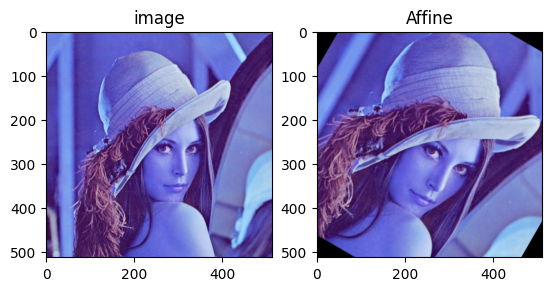

In [28]:
# 아핀 변환
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./data/lena.jpg')
rows, cols, ch = img.shape

M = cv2.getRotationMatrix2D( (rows/2,cols/2), -30, 1.2)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121)
plt.imshow(img)
plt.title('image')

plt.subplot(122)
plt.imshow(dst)
plt.title('Affine')
plt.show()

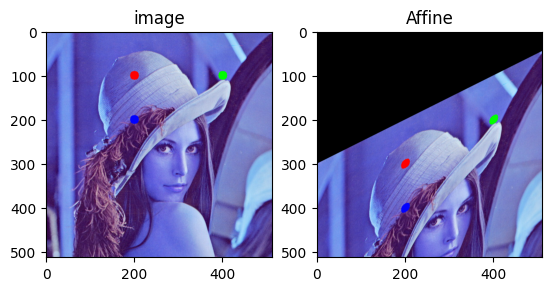

In [29]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./data/lena.jpg')
rows, cols, ch = img.shape

pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (200,100), 10, (255,0,0),-1)
cv2.circle(img, (400,100), 10, (0,255,0),-1)
cv2.circle(img, (200,200), 10, (0,0,255),-1)

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Affine')
plt.show()

In [30]:
# 영상 덧셈
import cv2
import numpy as np

src1 = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
src2 = np.zeros(shape=(512,512), dtype=np.uint8) + 100

dst1 = src1 + src2
dst2 = cv2.add(src1, src2)
#dst2 = cv2.add(src1, src2, dtype = cv2.CV_8U)

cv2.imshow('dst1',  dst1)
cv2.imshow('dst2',  dst2)
cv2.waitKey()    
cv2.destroyAllWindows()


In [31]:
# 비트 연산
import cv2
import numpy as np

src1 = cv2.imread('./data/lena.jpg')
src2 = cv2.imread('./data/opencv_logo.png')
cv2.imshow('src2',  src2)

#1
rows,cols,channels = src2.shape
roi = src1[0:rows, 0:cols]

#2
gray = cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
cv2.imshow('mask',  mask)
cv2.imshow('mask_inv',  mask_inv)

#3
src1_bg = cv2.bitwise_and(roi, roi, mask = mask)
cv2.imshow('src1_bg',  src1_bg)

#4
src2_fg = cv2.bitwise_and(src2, src2, mask = mask_inv)
cv2.imshow('src2_fg',  src2_fg)

#5
##dst = cv2.add(src1_bg, src2_fg)
dst = cv2.bitwise_or(src1_bg, src2_fg)
cv2.imshow('dst',  dst)

#6
src1[0:rows, 0:cols] = dst

cv2.imshow('result',src1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [32]:
# 반전 영상
import cv2
import numpy as np

src1 = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
src2 = np.zeros(shape=(512,512), dtype=np.uint8)+255

dst1 = 255 - src1
dst2 = cv2.subtract(src2, src1)
dst3 = cv2.compare(dst1, dst2, cv2.CMP_NE)
n    = cv2.countNonZero(dst3)
print('n = ', n)

cv2.imshow('dst1',  dst1)
cv2.imshow('dst2',  dst2)
cv2.waitKey()    
cv2.destroyAllWindows()


n =  0


In [33]:
# 0420.py
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src)
print('src:', minVal, maxVal, minLoc, maxLoc)

dst = cv2.normalize(src, None, 100, 200, cv2.NORM_MINMAX)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dst)
print('dst:', minVal, maxVal, minLoc, maxLoc)

cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()


src: 18.0 248.0 (265, 198) (116, 273)
dst: 100.0 200.0 (265, 198) (116, 273)


In [34]:
# 0421.py
import cv2
import numpy as np
import time

dst = np.full((512,512,3), (255, 255, 255), dtype= np.uint8)
nPoints = 100
pts = np.zeros((1, nPoints, 2), dtype=np.uint16)

cv2.setRNGSeed(int(time.time()))
cv2.randu(pts, (0, 0), (512, 512))
            
# draw points
for k in range(nPoints):
    x, y = pts[0, k][:] # pts[0, k, :]
    cv2.circle(dst,(x,y),radius=5,color=(0,0,255),thickness=-1)
    
cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()


In [35]:
# 0422.py
import cv2
import numpy as np
import time

dst = np.full((512,512,3), (255, 255, 255), dtype= np.uint8)
nPoints = 100
pts = np.zeros((1, nPoints, 2), dtype=np.uint16)

cv2.setRNGSeed(int(time.time()))
cv2.randn(pts, mean=(256, 256), stddev=(50, 50))
            
# draw points
for k in range(nPoints):
    x, y = pts[0][k, :] # pts[0, k, :]
    cv2.circle(dst,(x,y),radius=5,color=(0,0,255),thickness=-1)
    
cv2.imshow('dst', dst)                
cv2.waitKey()    
cv2.destroyAllWindows()


In [36]:
# 0423.py
import cv2
import numpy as np

X = np.array([[0, 0,  0,100,100,150, -100,-150],
              [0,50,-50,  0, 30,100,  -20,-100]], dtype=np.float64)
X = X.transpose() # X = X.T

cov, mean = cv2.calcCovarMatrix(X, mean=None, 
                               flags = cv2.COVAR_NORMAL + cv2.COVAR_ROWS)
print('mean=', mean)
print('cov=', cov)

ret, icov = cv2.invert(cov)
print('icov=',icov)

v1 = np.array([[0],[0]] , dtype=np.float64)
v2 = np.array([[0],[50]], dtype=np.float64)

dist = cv2.Mahalanobis(v1, v2, icov)
print('dist = ', dist)
                
cv2.waitKey()    
cv2.destroyAllWindows()


mean= [[12.5   1.25]]
cov= [[73750.  34875. ]
 [34875.  26287.5]]
icov= [[ 3.63872307e-05 -4.82740722e-05]
 [-4.82740722e-05  1.02084955e-04]]
dist =  0.5051854992128457


In [37]:
# 0424.py
import cv2
import numpy as np
 
X = np.array([[0, 0,  0,100,100,150, -100,-150],
                 [0,50,-50,  0, 30,100,  -20,-100]], dtype=np.float64)
X = X.transpose() # X = X.T

cov, mean = cv2.calcCovarMatrix(X, mean=None,
                                    flags=cv2.COVAR_NORMAL+cv2.COVAR_ROWS)
ret, icov = cv2.invert(cov)

dst = np.full((512,512,3), (255, 255, 255), dtype= np.uint8)
rows, cols, channel = dst.shape
centerX = cols//2
centerY = rows//2

v2 = np.zeros((1,2), dtype=np.float64)
FLIP_Y = lambda y: rows - 1 - y

# draw Mahalanobis distance
for y in range(rows):
    for x in range(cols):
        v2[0,0] = x - centerX
        v2[0,1] = FLIP_Y(y) - centerY # y-축 뒤집기 
        dist = cv2.Mahalanobis(mean, v2, icov)
        if dist < 0.1:
            dst[y, x] = [50, 50, 50]
        elif dist < 0.3:
            dst[y, x] = [100, 100, 100]
        elif dist < 0.8:
            dst[y, x] = [200, 200, 200]
        else:
            dst[y, x] = [250, 250, 250]
            
for k in range(X.shape[0]):
    x, y = X[k,:]
    cx = int(x+centerX)
    cy = int(y+centerY)
    cy = FLIP_Y(cy)
    cv2.circle(dst,(cx,cy),radius=5,color=(0,0,255),thickness=-1)
    
# draw X, Y-axes
cv2.line(dst, (0, 256), (cols-1, 256), (0, 0, 0))
cv2.line(dst, (256,0), (256,rows), (0, 0, 0))

# calculate eigen vectors
ret, eVals, eVects = cv2.eigen(cov)
print('eVals=',  eVals)
print('eVects=', eVects)

def ptsEigenVector(eVal, eVect):
##    global mX, centerX, centerY
    scale = np.sqrt(eVal) # eVal[0]
    x1 = scale*eVect[0]
    y1 = scale*eVect[1]
    x2, y2 = -x1, -y1 # 대칭

    x1 += mean[0,0] + centerX
    y1 += mean[0,1] + centerY
    x2 += mean[0,0] + centerX
    y2 += mean[0,1] + centerY
    y1 = FLIP_Y(y1)
    y2 = FLIP_Y(y2)
    return int(x1), int(y1), int(x2), int(y2)

 
# draw eVects[0]
x1, y1, x2, y2 = ptsEigenVector(eVals[0], eVects[0])
cv2.line(dst, (x1, y1), (x2, y2), (255, 0, 0), 2)

# draw eVects[1]
x1, y1, x2, y2 = ptsEigenVector(eVals[1], eVects[1])
cv2.line(dst, (x1, y1), (x2, y2), (255, 0, 0), 2)

cv2.imshow('dst', dst)               
cv2.waitKey()    
cv2.destroyAllWindows()


eVals= [[92202.13359547]
 [ 7835.36640453]]
eVects= [[ 0.88390424  0.46766793]
 [-0.46766793  0.88390424]]


In [38]:
# 0425.py
import cv2
import numpy as np

X = np.array([[0, 0,  0,100,100,150, -100,-150],
                 [0,50,-50,  0, 30,100,  -20,-100]], dtype=np.float64)
X = X.transpose() # X = X.T

##mean = cv2.reduce(X, 0, cv2.REDUCE_AVG)
##print('mean = ', mean)

mean, eVects = cv2.PCACompute(X, mean=None)
print('mean = ', mean)
print('eVects = ', eVects)

Y =cv2.PCAProject(X, mean, eVects)
print('Y = ', Y)

X2 =cv2.PCABackProject(Y, mean, eVects)
print('X2 = ', X2)
print(np.allclose(X, X2))
cv2.waitKey()    
cv2.destroyAllWindows()


mean =  [[12.5   1.25]]
eVects =  [[ 0.88390424  0.46766793]
 [-0.46766793  0.88390424]]
Y =  [[ -11.63338792    4.74096885]
 [  11.75000868   48.93618085]
 [ -35.01678451  -39.45424315]
 [  76.75703609  -42.02582434]
 [  90.78707404  -15.50869713]
 [ 167.71904127   22.98120308]
 [-109.37717055   33.82967723]
 [-190.9858171   -13.49926538]]
X2 =  [[ 1.77635684e-15  0.00000000e+00]
 [ 3.55271368e-15  5.00000000e+01]
 [ 0.00000000e+00 -5.00000000e+01]
 [ 1.00000000e+02 -7.10542736e-15]
 [ 1.00000000e+02  3.00000000e+01]
 [ 1.50000000e+02  1.00000000e+02]
 [-1.00000000e+02 -2.00000000e+01]
 [-1.50000000e+02 -1.00000000e+02]]
True


In [39]:
# 0426.py
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg') 
b, g, r = cv2.split(src) 
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)

X = src.reshape(-1, 3)
print('X.shape=', X.shape)

mean, eVects = cv2.PCACompute(X, mean=None)
print('mean = ', mean)
print('eVects = ', eVects)

Y =cv2.PCAProject(X, mean, eVects)
Y = Y.reshape(src.shape)
print('Y.shape=', Y.shape)

eImage = list(cv2.split(Y))
for i in range(3):
    cv2.normalize(eImage[i], eImage[i], 0, 255, cv2.NORM_MINMAX)
    eImage[i]=eImage[i].astype(np.uint8)
    
cv2.imshow('eImage[0]', eImage[0])
cv2.imshow('eImage[1]', eImage[1])
cv2.imshow('eImage[2]', eImage[2])
cv2.waitKey()    
cv2.destroyAllWindows()


X.shape= (262144, 3)
mean =  [[105.39899  99.5627  179.7303 ]]
eVects =  [[ 0.3958077   0.68919426  0.6069166 ]
 [-0.6352216  -0.27180612  0.72292113]
 [ 0.6631967  -0.6716642   0.3302081 ]]
Y.shape= (512, 512, 3)
